# Phane Pricing Problem

Description: I recently encountered an advertisement for phane in a Botswana based Facebook group, with the following (quantity, price) pairs: $(50\text{kg}, \text{BWP}1,500)$, $(20\text{kg}, \text{BWP}450)$, $(9\text{kg}, \text{BWP}225)$, and $(5\text{kg}, \text{BWP}150)$. My curious mind could not help but estimate the cost per kilogram under each bundle. I quickly realized that the 5kg and 50kg bundles had the same cost per kilogram. My intuition for these kinds of bundled pricing is that the larger bundles should be cheaper than the smaller ones. Although the entrepreneur behind the ad was not receptive to this feedback, I will not let it go to waste. I am going to use it to create an original analysis for my GitHub portfolio answering the question: How much should the 50kg bundle be sold for?

A key assumption I am going to make is that the entrepreneur wants to price discriminate. Therefore, whatever price we get for the 50kg should not lead to a situation where an individual with a demand for the 50kg bundle can purchase some combination of the other bundles at a lower price than they would the 50kg bundle. At the current prices, we observe that an individual with a demand for the 50kg bundle can get it for cheaper by buying a combination of the other bundles. As an example, they can buy 2 20kg bundles and 2 5kg bundles for $2\times(\text{BWP}450) + 2(\text{BWP}(150) = \text{BWP}1,200$, which is strictly less than the BWP1,500 price tag of the 50kg bundle. (In fact, they can consume more than their demand for less than the BWP1,500 if they purchase 3 of the 20kg bundle because $3\times(\text{BWP}450) = \text{BWP}1,350 < \text{BWP}1,500$. The price we get should not allow for any other bundle to erode the demand for the 50kg bundle. 

This write-up is intended to demonstrate how I think through solving a problem and is therefore not intended as a report or presentation to an audience, especially a non-technical one. If I have more time down the road, I might consider creating a presentation for a non-technical audience of this analysis. 

## Additional Information

Phane is a seasonal caterpillar that feeds primarily on the leaves of the Mophane tree in Southern Africa and is a local delicacy. 

Although irrelevant to the problem, USDBWP exchange rate on the day of this analysis was USD 1 = BWP 11.07. 

My intution that larger bundles should be cheaper than smaller ones is linked to the length of time it takes to convert inventory to cash and time value of money. 

## Analysis

I begin the analysis by importing relevant packages. It goes without saying that Pandas, Numpy, Pyplot, and SKLearn are the bread and butter of an analysis of this nature. 

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

The first step is to store the (quantity, price) pairs in a data frame. 

In [51]:
df = pd.DataFrame(data={'Size in Kilograms': [5, 9, 20, 50], 'Price per Kilogram in BWP': [30, 25, 22.5, 30]})
df

,Size in Kilograms,Price per Kilogram in BWP
0,5,30.0
1,9,25.0
2,20,22.5
3,50,30.0


Next I plot the data in the dataframe to confirm my suspicion that there is an anomaly with the price of the 50kg bundle. 

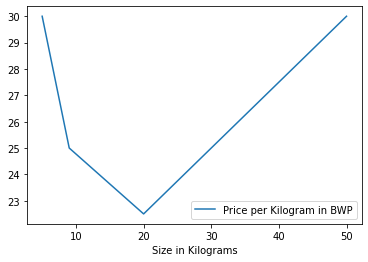

In [52]:
df.plot(x = 'Size in Kilograms', y = 'Price per Kilogram in BWP', kind = 'line')
plt.show()

From our plot, and disregarding the 50kg bundle, we observe that as the size of the bundle increases, the cost per kilogram decreases. The first question that I can think of is how the cost is decreasing. I naively choose to assume at this point that the cost decreases linearly. I fit a linear model to the data - excluding the 50kg bundle because it is what we want to predict.

In [53]:
model = LinearRegression()
model.fit(df.iloc[0:3, 0].values.reshape(-1, 1), df.iloc[0:3, 1].values.reshape(-1, 1))
preds = model.predict([[5],[9],[20],[50]]) # Note to self: Scalability

I predict new prices for all the bundles based on the Linear Model we fitted. I add them to our data frame. 

In [54]:
df['LM Prices per Kilogram in BWP'] = [preds[i,0] for i in range(4)]
df

,Size in Kilograms,Price per Kilogram in BWP,LM Prices per Kilogram in BWP
0,5,30.0,28.632597
1,9,25.0,26.864641
2,20,22.5,22.002762
3,50,30.0,8.743094


For comparison, I plot the predicted prices alongside the original prices. This visualization is enough for us to question whether a linear model is the best way to model this problem. Intuitively, BWP8.74 per kilogram for the 50kg bundle seems like too cheap a price. 

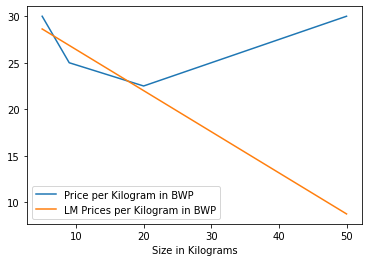

In [55]:
df.plot(x = 'Size in Kilograms', y = ['Price per Kilogram in BWP', 'LM Prices per Kilogram in BWP'], kind = 'line')
plt.show()

I will state without proof the fact that the only way to avoid a situation where other bundles cannibalize the market share of the 50kg bundle, the cost per kilogram must strictly decrease as the size increases. This is the case with our naive linear model above and therefore it is 'acceptable'. This means our next best guess is to try an exponentially decaying model. 

As I do not have experience working with exponential regression, I drew inspiration from a snippet of code by the Indian Institute of Science Education and Research in Pune, India. Their code can be found at http://www.iiserpune.ac.in/~cathale/lects/bio322-phybio1/2015bio322/exponFitTest2.py. I also drew inspiration from this YouTube video: https://www.youtube.com/watch?v=4vryPwLtjIY&ab_channel=APMonitor.com. 

Unfortunately, the method did not work because the covariance of my parameters could not be estimated. In the interest of time, I am flagging this as an area for growth and will return to it later to learn about exponential regression and understand the error. My initial guess is because I am using only 3 data points, they are too few to yield any useful results. 

To move forward, I use the Desmos Online Graphing calculator to plot the 3 data points and use trial and error to fit an exponential decay function to it. This works well since I only have 3 data points. Recall that an exponential decay function is

$$y = a + b\cdot e^{-(cx+d)}$$

where $a,b,c,d$ are parameters of the function and $x$ is the covariate. $a$ is the asymptotic value of the covariate that the function decays to, $b$ and $c$ determine the curvature of the curve, and $d$ shifts the curve along the x-axis. Using trial and error we get the function to be about:

$$y = 22 +  e^{-(0.2x-3)}$$

I could use SciPy's optimize function to get the optimal parameters, but this is nothing more than a Sunday evening cure for boredom. (I will return later to do this).

The original data can be decomposed into the following piecewise function:

$$
y =
\begin{cases}
    -1.2x + 36.25 & \text{for } 5 \leq x \leq 9\\
    \frac{-5x + 595}{22}  & \text{for } 9 \leq x \leq 20
\end{cases}
$$

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[30.25, 29.05, 27.85, 26.65, 25.450000000000003, 24.772727272727273, 24.545454545454547, 24.318181818181817, 24.09090909090909, 23.863636363636363, 23.636363636363637, 23.40909090909091, 23.181818181818183, 22.954545454545453, 22.727272727272727, 22.5]


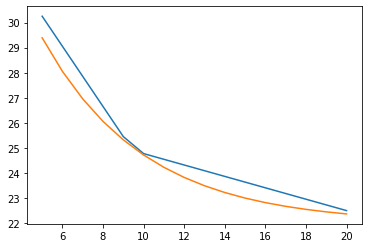

In [56]:
def func(x):
    return 22 + np.exp(-0.2*x +3)

x = [i for i in range(5,21)]
y = [(-1.2*i + 36.25) if i < 10 else ((-5*i+595)/22) for i in x]
print(x)
print(y)

#y = np.asarray([float(i) for i in df.iloc[0:3, 1].values.reshape(-1, 1)])


fits = [func(i) for i in x]

#print(fits)
plt.plot(x,y)
plt.plot(x,fits)
#plt.title('curve fit')
#plt.xlabel('x-vals')
#plt.ylabel('y-vals')
#plt.show()

We see that the exponential curve fairly approximates the trend of the price per kilogram. We use that function to predict the price per kilogram for the 50kg bundle. 

In [57]:
query = 50
price_per_kg = func(query)
price_per_kg

22.000911881965553

We get BWP22 per kilogram. We multiply this by 50kg to get the recommended price for that bundle.

In [58]:
price = price_per_kg * query
price

1100.0455940982777

The entrepreneur should sell the 50kg bundle for BWP1,100. 

In [59]:
df['EM Prices per Kilogram in BWP'] = [func(5), func(9), func(20), func(50)]
df['Recommended Bundle Price (BWP)'] = [150, 225, 450, 1100]
df

,Size in Kilograms,Price per Kilogram in BWP,LM Prices per Kilogram in BWP,EM Prices per Kilogram in BWP,Recommended Bundle Price (BWP)
0,5,30.0,28.632597,29.389056,150
1,9,25.0,26.864641,25.320117,225
2,20,22.5,22.002762,22.367879,450
3,50,30.0,8.743094,22.000912,1100
